Question 1. 
>
Perform Exploratory Data Analysis (EDA) tasks
1.  Visualize the 10 random rows of the data set
2.  Generate the description for numeric variables
3. Check the shape of the data set
4.  Generate the correlation matrix
5.  Generate a correlogram

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import mean_absolute_error



In [ ]:
df= pd.read_excel('admissionf.xlsx')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   ChanceofAdmit      500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**<H1>a) Visualize the 10 random rows of the data set**

In [ ]:
#This allow a random selection of the same row more than once
df = df.sample(n=10,replace=True)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
287,288,324,114,5,5.0,4.5,9.08,1,0.89
281,282,317,110,3,4.0,4.5,9.11,1,0.80
129,130,333,118,5,5.0,5.0,9.35,1,0.92
191,192,323,110,5,4.0,5.0,8.98,1,0.87
301,302,319,108,2,2.5,3.0,8.76,0,0.66
72,73,321,111,5,5.0,5.0,9.45,1,0.93
23,24,334,119,5,5.0,4.5,9.70,1,0.95
205,206,295,99,2,2.5,3.0,7.65,0,0.57
339,340,324,107,5,3.5,4.0,8.66,1,0.81
293,294,312,98,1,3.5,3.0,8.18,1,0.64


Serial No. is not required

In [ ]:
df = df.drop('Serial No.',axis = 1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
287,324,114,5,5.0,4.5,9.08,1,0.89
281,317,110,3,4.0,4.5,9.11,1,0.80
129,333,118,5,5.0,5.0,9.35,1,0.92
191,323,110,5,4.0,5.0,8.98,1,0.87
301,319,108,2,2.5,3.0,8.76,0,0.66
72,321,111,5,5.0,5.0,9.45,1,0.93
23,334,119,5,5.0,4.5,9.70,1,0.95
205,295,99,2,2.5,3.0,7.65,0,0.57
339,324,107,5,3.5,4.0,8.66,1,0.81
293,312,98,1,3.5,3.0,8.18,1,0.64


**Visualisation using heat map**

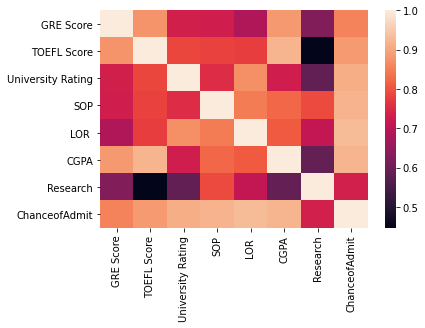

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

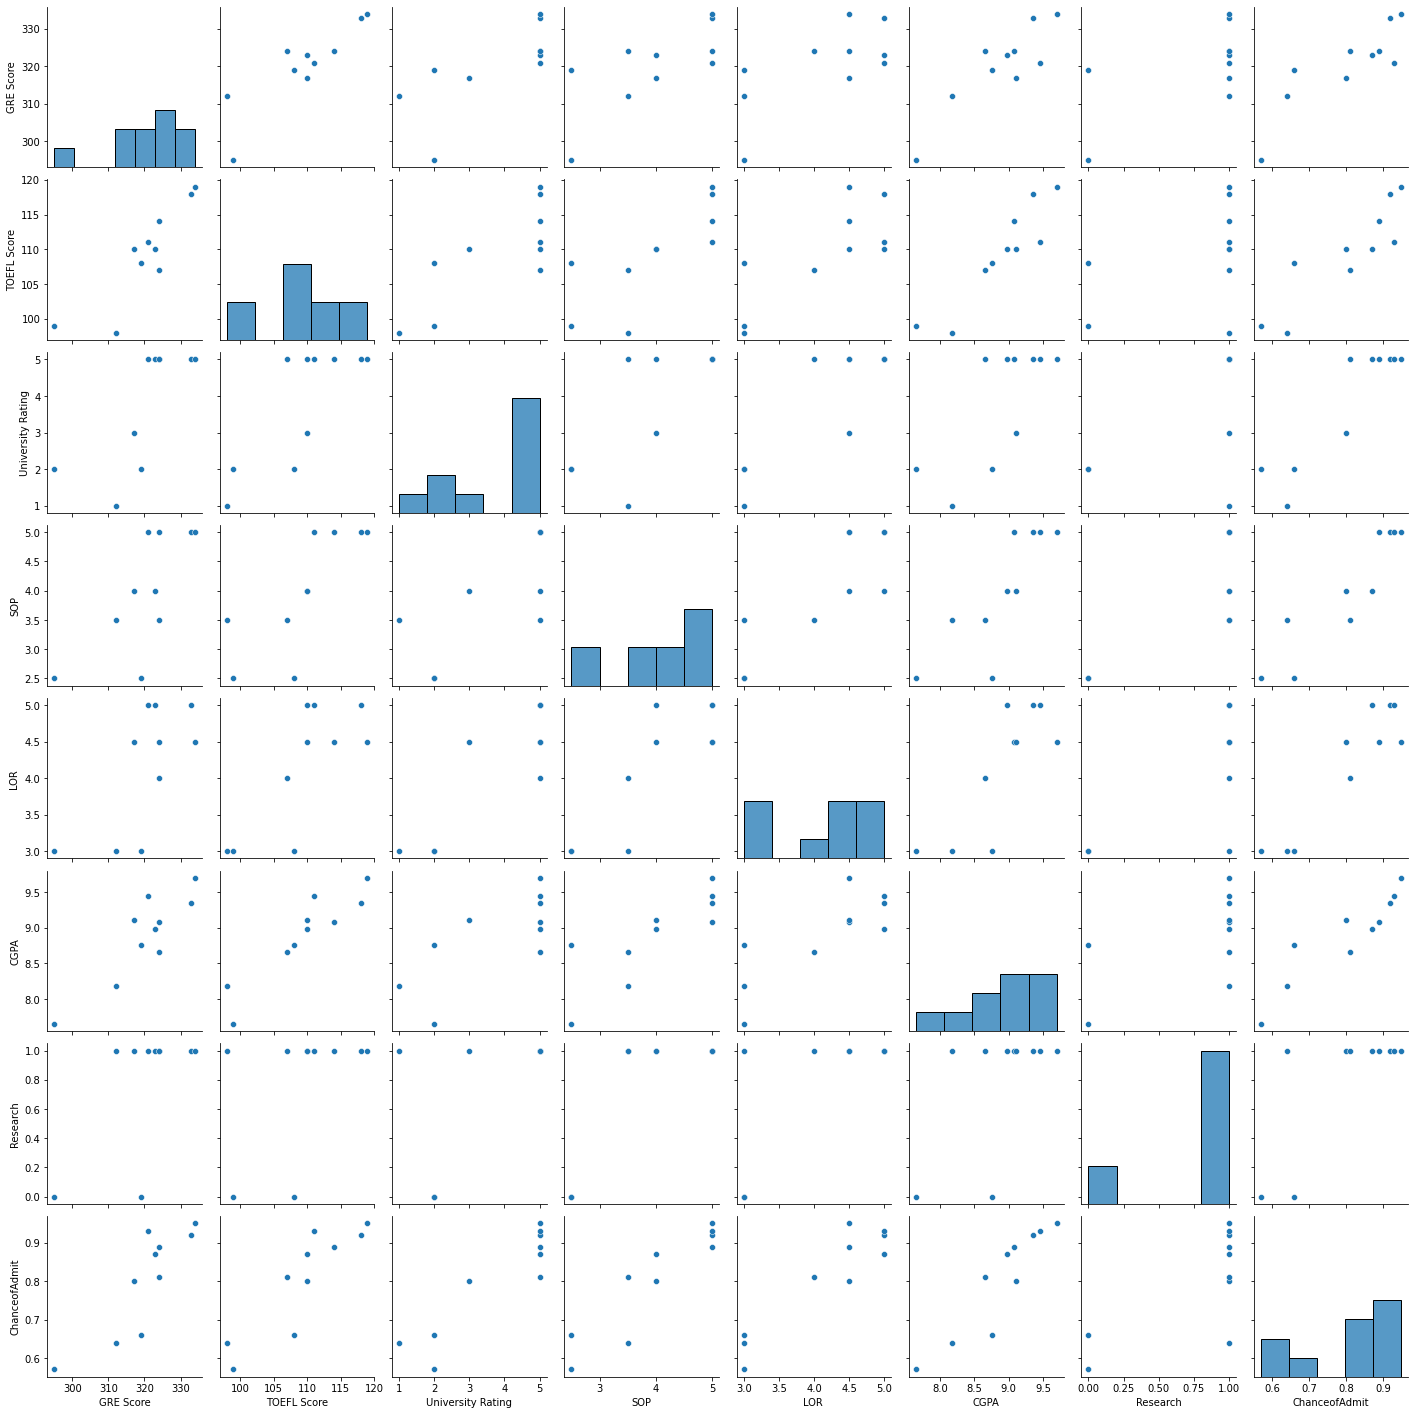

In [ ]:
sns.pairplot(df)

**<h1>b) Generate the description for numeric variables**

In [ ]:
df.info () 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   ChanceofAdmit      500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**<h1>c)Shape of the data set**

In [ ]:
shape = df.shape
print(shape)

(500, 9)


**<h1>d)Correlation matrix**

     GRE Score  TOEFL Score  University Rating  ...  CGPA  Research  ChanceofAdmit
0          337          118                  4  ...  9.65         1           0.92
1          324          107                  4  ...  8.87         1           0.76
2          316          104                  3  ...  8.00         1           0.72
3          322          110                  3  ...  8.67         1           0.80
4          314          103                  2  ...  8.21         0           0.65
..         ...          ...                ...  ...   ...       ...            ...
495        332          108                  5  ...  9.02         1           0.87
496        337          117                  5  ...  9.87         1           0.96
497        330          120                  5  ...  9.56         1           0.93
498        312          103                  4  ...  8.43         0           0.73
499        327          113                  4  ...  9.04         0           0.84

[50

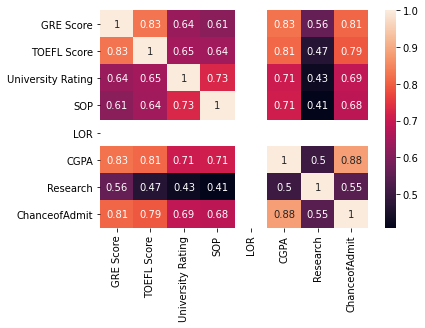

In [ ]:
df = pd.DataFrame(df,columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','ChanceofAdmit'])
print (df)
corrMatrix = df.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

**<h1>e)Generate a correlogram**
>
A correlogram or correlation matrix allows to analyse the relationship between each pair of numeric variables of a dataset. The relationship between each pair of variable is visualised through a scatterplot, or a symbol that represents the correlation (bubble, line, number..).
>
Same as pair plot



**<h1>Question 2**

**<h1>Find out the minimum and maximum values for GRE
score</h1>**


In [ ]:
column = df["GRE Score"]
max_value = column.max()
print(max_value)
min_value = column.min()
print(min_value)

340
290


**<h1>Question 3**
**<h1>Find out the percentage of universities for each university rating**

In [ ]:
print(df['University Rating'].value_counts())
print("percentage of universities for each university rating:\n",df['University Rating'].value_counts(normalize=True)*100)

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
percentage of universities for each university rating:
 3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64


**<h1>Question 4**
<H1>Convert the target variable “Chance of Admit” to
categorical having values 0 and 1,such that :
</H1>

**Students having the “Chance of Admit” value > 0.80, are assigned**
>
**value 1, and**
>
**Students having the “Chance of Admit” value < 0.80, are assigned**
>
**value 0**
>
**Where 0: Low chance of Admission and 1: High chance of**
>
**admission**
**bold text**


In [ ]:
#################################
bins = [0.00,0.80,0.99]
labels = ["0 Low chance of Admission","1 High chance of admission"]
df['Categorical_Chance_of_Admit'] = pd.cut(df['ChanceofAdmit'], bins=bins, labels=labels)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit,Categorical_Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1 High chance of admission
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0 Low chance of Admission
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0 Low chance of Admission
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0 Low chance of Admission
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0 Low chance of Admission
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,1 High chance of admission
496,497,337,117,5,5.0,5.0,9.87,1,0.96,1 High chance of admission
497,498,330,120,5,4.5,5.0,9.56,1,0.93,1 High chance of admission
498,499,312,103,4,4.0,5.0,8.43,0,0.73,0 Low chance of Admission


**<h1>Question 5**
**<h1>Build a Decision Tree classifier, to predict whether a**
**student has a low or high chance of admission to a chosen**
**university. Perform Hyperparameter Tuning to improve**
**the accuracy of the model.</h1>**

Accuracy without any Hyperparameter tuning: 0.9133333333333333
Accuracy: 0.94


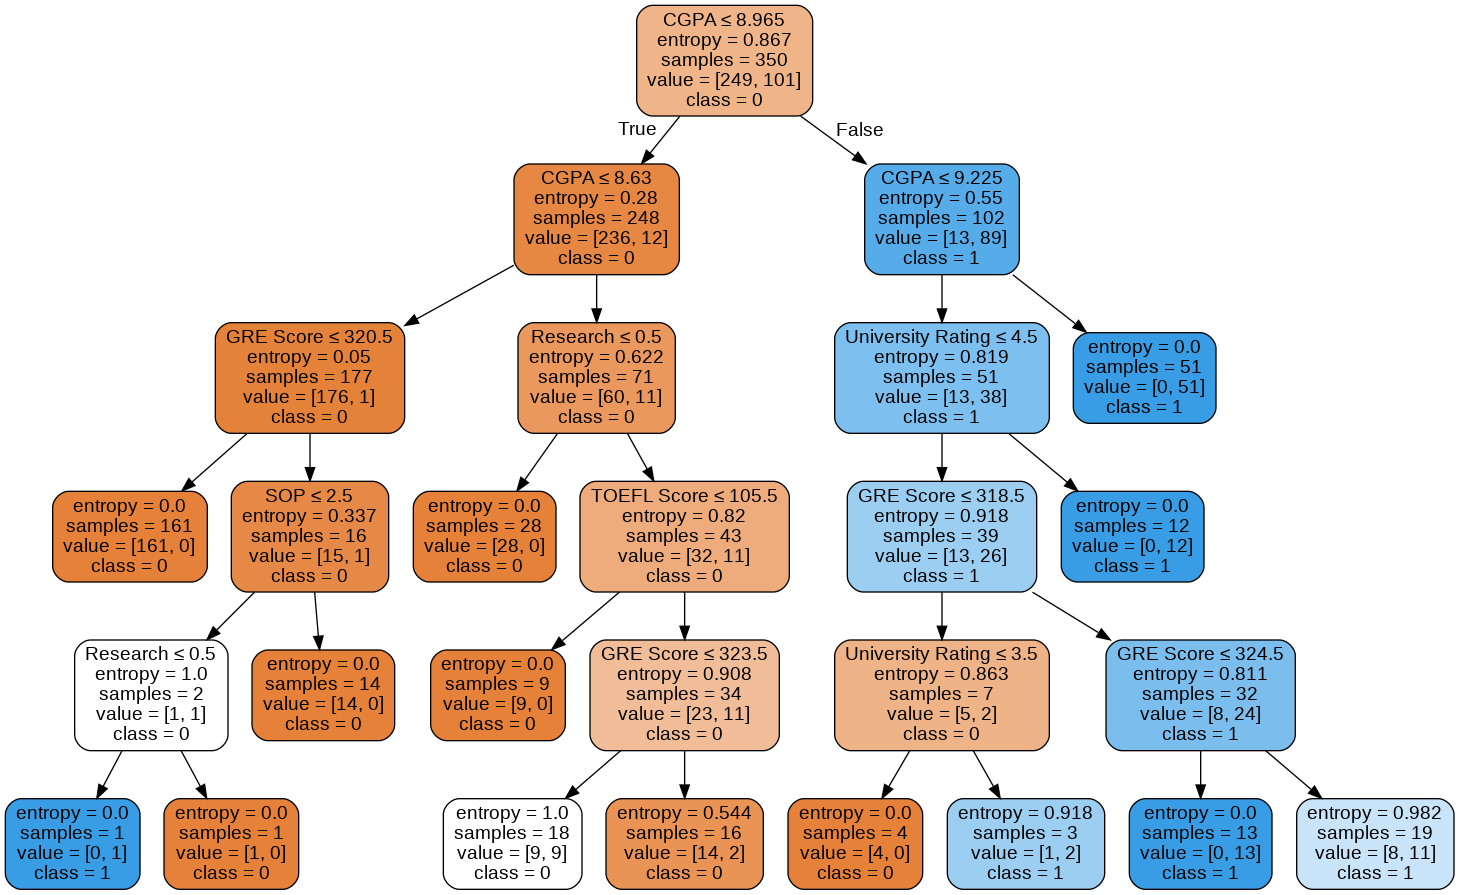

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#split dataset in features and target variable
feature_cols = ['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research']
X = df[feature_cols] # Features
y = df.Categorical_Chance_of_Admit# Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy without any Hyperparameter tuning:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Admission.png')
Image(graph.create_png())

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Admission.png')
Image(graph.create_png())


      

                                         


**<h3>Hyperparameter tuning:-**Throught hit and trial it appears that max_depth=5 gives the highest accuracy

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.92


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.92


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.92


**<h1>Question 6**
**<h1>Build a Random Forest classifier, to predict whether a
student has a low or high chance of admission to a chosen
university.**</h1>

In [ ]:
from sklearn.model_selection import train_test_split

X=df[['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research']]  # Features
y=df['Categorical_Chance_of_Admit']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#############################################

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.94


In [ ]:
clf=RandomForestClassifier(n_estimators=250)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#############################################

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**<h1>Question 7**
**<h1>Also use Ensemble Modelling techniques, to predict
whether a student has a low or high chance of admission
to a chosen university.**</h1>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Serial No.                   500 non-null    int64   
 1   GRE Score                    500 non-null    int64   
 2   TOEFL Score                  500 non-null    int64   
 3   University Rating            500 non-null    int64   
 4   SOP                          500 non-null    float64 
 5   LOR                          500 non-null    float64 
 6   CGPA                         500 non-null    float64 
 7   Research                     500 non-null    int64   
 8   ChanceofAdmit                500 non-null    float64 
 9   Categorical_Chance_of_Admit  500 non-null    category
dtypes: category(1), float64(4), int64(5)
memory usage: 35.9 KB


In [ ]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 

# load the data 
arr = df.values 
X = arr[:, 1:7] 
Y = arr[:, 9] 

kfold = model_selection.KFold(n_splits = 10, random_state = 8) 

# bagging classifier 
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 500, random_state = 8) 

results = model_selection.cross_val_score(model, X, Y, cv = kfold) 
print("accuracy :") 
print(results.mean()) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


accuracy :
0.9279999999999999


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X = arr[:, 1:7] 
Y = arr[:, 9] 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=0.30,random_state=12)

"""Now we can try setting different learning rates, 
so that we can compare the performance of the classifier's performance at different learning rates."""

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))


Learning rate:  0.05
Accuracy score (training): 0.947
Accuracy score (validation): 0.919
Learning rate:  0.075
Accuracy score (training): 0.947
Accuracy score (validation): 0.932
Learning rate:  0.1
Accuracy score (training): 0.947
Accuracy score (validation): 0.932
Learning rate:  0.25
Accuracy score (training): 0.953
Accuracy score (validation): 0.919
Learning rate:  0.5
Accuracy score (training): 0.977
Accuracy score (validation): 0.932
Learning rate:  0.75
Accuracy score (training): 0.994
Accuracy score (validation): 0.932
Learning rate:  1
Accuracy score (training): 0.994
Accuracy score (validation): 0.932


In [ ]:
from xgboost import XGBClassifier
X = arr[:, 1:7] 
Y = arr[:, 9] 
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

score = xgb_clf.score(X_val, y_val)

print(score)


0.9324324324324325


**<h1>Question 8**
**<h1>Compare all of the models and justify your choice about
the optimum model**</h1>

Since it is a classification problem both random forest and decision tree are successful techniques the accuracy of the model can be increased by using hyperparameter tuning techniques or ensemle techniques.
>
Converting continous values into categorical values was an important part.